In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import anndata as ad
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (4, 4)

In [2]:
# read in methylated gene body cytosine counts
countsdata = sc.read_h5ad('/u/project/jflint/heffel/BICAN3/210505/mcg_210505_raw_genebody_blacklist_counts.h5ad')

# read in gene body cytosine coverage
covdata = sc.read_h5ad('/u/project/jflint/heffel/BICAN3/210505/mcg_210505_raw_genebody_blacklist_coverage.h5ad')

In [3]:
countsdata

AnnData object with n_obs × n_vars = 5618 × 53100
    obs: 'pre_trimmed_pairs', 'trimmed_pairs', 'R1_contam_pass', 'R1_contam_fail', 'R2_contam_pass', 'R2_contam_fail', 'duspifter_input_mapped_mates', 'dupsifter_removed_duplicate_mates', 'R1_total_alignments', 'R1_whole_aligned_mates', 'R1_split_aligned_mates', 'R2_total_alignments', 'R2_whole_aligned_mates', 'R2_split_aligned_mates', 'R1_total_alignments_dedup', 'R1_whole_aligned_mates_dedup', 'R1_split_aligned_mates_dedup', 'R2_total_alignments_dedup', 'R2_whole_aligned_mates_dedup', 'R2_split_aligned_mates_dedup', 'discarded_alignments_illegal_overlap', 'reads_with_illegal_overlap', 'discarded_reads_multiple_primary', 'discarded_alignments_post_trim', 'read_pairs_with_multiple_valid_alignments', 'adjacent_split_alignment_total', 'adjacent_split_alignment_with_cut_site', 'adjacent_split_alignment_first_trim', 'adjacent_split_alignment_second_trim', 'potential_pairs_intra_enzymeless', 'potential_pairs_intra_enzyme', 'potential_pairs_i

In [4]:
countsdata.to_df().head()

geneslop2k,ENSG00000228794.12,ENSG00000230368.2,ENSG00000283040.1,ENSG00000272438.1,ENSG00000230699.2,ENSG00000241180.1,ENSG00000223764.2,ENSG00000187634.13,ENSG00000188976.11,ENSG00000187961.15,...,ENSG00000008735.14,ENSG00000100299.18,ENSG00000289244.2,ENSG00000212569.1,ENSG00000286508.1,ENSG00000251322.11,ENSG00000206841.1,ENSG00000225929.1,ENSG00000100312.11,ENSG00000254499.1
cell,,,,,,,,,,,,,,,,,,,,,
20210505-UMB5577-preAb-PFC-A09-L1_A1.allc.tsv.gz,0,0,0,10,2,2,0,9,11,3,...,0,0,5,0,0,29,0,8,8,8
20210505-UMB5577-preAb-PFC-A09-L1_A10.allc.tsv.gz,1,0,0,0,0,0,0,4,6,0,...,7,1,0,0,0,20,0,0,0,0
20210505-UMB5577-preAb-PFC-A09-L1_A11.allc.tsv.gz,2,0,0,1,1,0,5,7,8,0,...,11,7,0,0,0,0,0,1,1,1
20210505-UMB5577-preAb-PFC-A09-L1_A12.allc.tsv.gz,0,1,1,0,0,0,3,8,0,25,...,0,5,5,0,0,25,1,7,7,0
20210505-UMB5577-preAb-PFC-A09-L1_A13.allc.tsv.gz,0,0,0,18,18,5,0,13,23,0,...,14,0,0,0,0,8,0,0,0,0


In [5]:
countsdata.var.index

Index(['ENSG00000228794.12', 'ENSG00000230368.2', 'ENSG00000283040.1',
       'ENSG00000272438.1', 'ENSG00000230699.2', 'ENSG00000241180.1',
       'ENSG00000223764.2', 'ENSG00000187634.13', 'ENSG00000188976.11',
       'ENSG00000187961.15',
       ...
       'ENSG00000008735.14', 'ENSG00000100299.18', 'ENSG00000289244.2',
       'ENSG00000212569.1', 'ENSG00000286508.1', 'ENSG00000251322.11',
       'ENSG00000206841.1', 'ENSG00000225929.1', 'ENSG00000100312.11',
       'ENSG00000254499.1'],
      dtype='object', name='geneslop2k', length=53100)

In [6]:
countsdata.shape == covdata.shape # check that countsdata & covdata are the same shape

True

In [7]:
(countsdata.obs.index == covdata.obs.index).all() # check that row indices match

np.True_

In [8]:
(countsdata.var.index == covdata.var.index).all() # check that indices match

np.True_

In [9]:
countsdata.shape # check cells x features

(5618, 53100)

In [10]:
# create readable gene ID's (ie: FAM41C as opposed to ENSG00000230368.2)
conv_table = pd.read_csv("/u/project/cluo/heffel/BICAN/ensg_to_symbol.tsv", 
                         sep="\\t").set_index("ENSG").to_dict()["Symbol"] # read in csv file

# copy gene ID's to both AnnData objects
covdata.var.index = covdata.var.index.map(lambda x: conv_table.get(x, x))
countsdata.var.index = countsdata.var.index.map(lambda x: conv_table.get(x, x))

In [11]:
len(".allc.tsv.gz") # check length

12

In [12]:
# truncate (".allc.tsv.gz") from cells
countsdata.obs.index = [i[:-12] for i in countsdata.obs.index]
covdata.obs.index = [i[:-12] for i in covdata.obs.index]

In [13]:
countsdata_df = countsdata.to_df() # turn countsdata AnnData obj into a pandas DataFrame
countsdata_df.head(5) # print first 5 rows

geneslop2k,ENSG00000228794.12,FAM41C,ENSG00000283040,ENSG00000272438,ENSG00000230699,ENSG00000241180,LINC02593,SAMD11,NOC2L,KLHL17,...,MAPK8IP2,ARSA,ENSG00000289244.2,Y_RNA,ENSG00000286508,SHANK3,RNU6-409P,ENSG00000225929,ACR,ENSG00000254499
20210505-UMB5577-preAb-PFC-A09-L1_A1,0,0,0,10,2,2,0,9,11,3,...,0,0,5,0,0,29,0,8,8,8
20210505-UMB5577-preAb-PFC-A09-L1_A10,1,0,0,0,0,0,0,4,6,0,...,7,1,0,0,0,20,0,0,0,0
20210505-UMB5577-preAb-PFC-A09-L1_A11,2,0,0,1,1,0,5,7,8,0,...,11,7,0,0,0,0,0,1,1,1
20210505-UMB5577-preAb-PFC-A09-L1_A12,0,1,1,0,0,0,3,8,0,25,...,0,5,5,0,0,25,1,7,7,0
20210505-UMB5577-preAb-PFC-A09-L1_A13,0,0,0,18,18,5,0,13,23,0,...,14,0,0,0,0,8,0,0,0,0


In [14]:
covdata_df = covdata.to_df() # turn covdata AnnData obj into a df
covdata_df.head(5) # print first 5 rows

geneslop2k,ENSG00000228794.12,FAM41C,ENSG00000283040,ENSG00000272438,ENSG00000230699,ENSG00000241180,LINC02593,SAMD11,NOC2L,KLHL17,...,MAPK8IP2,ARSA,ENSG00000289244.2,Y_RNA,ENSG00000286508,SHANK3,RNU6-409P,ENSG00000225929,ACR,ENSG00000254499
20210505-UMB5577-preAb-PFC-A09-L1_A1,0,0,0,11,2,2,0,14,12,3,...,21,0,5,0,0,32,0,8,8,8
20210505-UMB5577-preAb-PFC-A09-L1_A10,1,0,0,0,0,0,0,4,6,0,...,9,4,0,0,0,32,0,0,0,0
20210505-UMB5577-preAb-PFC-A09-L1_A11,2,0,0,2,2,0,15,13,18,10,...,34,10,0,0,16,18,0,3,8,8
20210505-UMB5577-preAb-PFC-A09-L1_A12,0,1,1,0,0,0,3,18,0,26,...,0,5,5,0,0,38,1,8,8,0
20210505-UMB5577-preAb-PFC-A09-L1_A13,0,0,0,20,20,5,0,39,31,5,...,18,0,0,0,0,11,0,0,0,0


## filter by mean feature coverage

In [15]:
mean_cell_cov = covdata_df.mean(axis=1) # Series of mean cell coverage
mean_cell_cov

20210505-UMB5577-preAb-PFC-A09-L1_A1     6.112561
20210505-UMB5577-preAb-PFC-A09-L1_A10    6.479849
20210505-UMB5577-preAb-PFC-A09-L1_A11    6.773879
20210505-UMB5577-preAb-PFC-A09-L1_A12    7.068117
20210505-UMB5577-preAb-PFC-A09-L1_A13    5.441808
                                           ...   
20210505-UMB6096-preAb-PFC-B08-L1_P5     7.224840
20210505-UMB6096-preAb-PFC-B08-L1_P6     9.154614
20210505-UMB6096-preAb-PFC-B08-L1_P7     4.601714
20210505-UMB6096-preAb-PFC-B08-L1_P8     5.918851
20210505-UMB6096-preAb-PFC-B08-L1_P9     5.809718
Length: 5618, dtype: float64

(-5.0, 20.0)

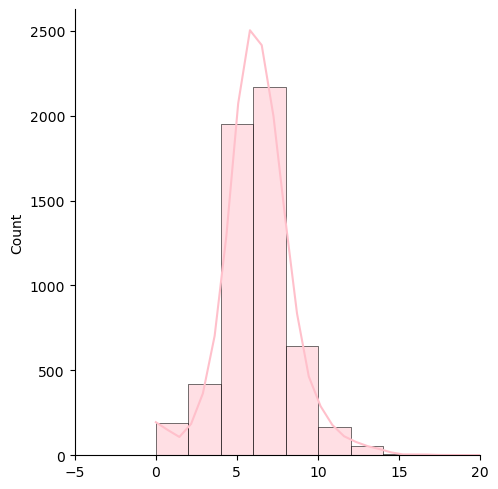

In [17]:
# plot mean cell coverage
sns.displot(mean_cell_cov, kde=True, binwidth=2, color='pink')
plt.xlim(left=-5, right=20)

In [16]:
mean_feat_cov = covdata_df.mean(axis=0) # Series of mean feature coverage
mean_feat_cov

geneslop2k
ENSG00000228794.12     1.073870
FAM41C                 1.619082
ENSG00000283040        0.536134
ENSG00000272438        8.934140
ENSG00000230699        4.211819
                        ...    
SHANK3                27.479886
RNU6-409P              0.462442
ENSG00000225929        2.000712
ACR                    1.741545
ENSG00000254499        1.185831
Length: 53100, dtype: float64

(-5.0, 50.0)

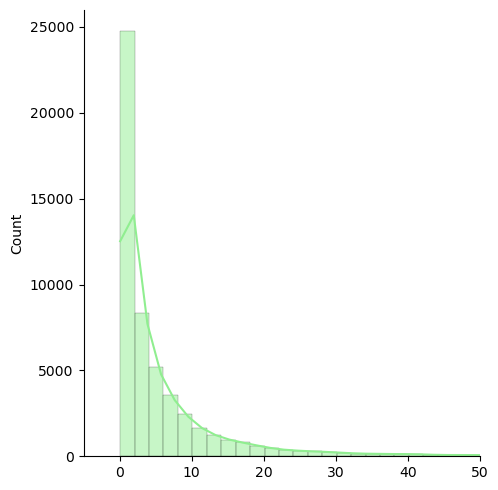

In [18]:
# plot mean feature coverage
sns.displot(mean_feat_cov, kde=True, binwidth=2, color='lightgreen')
plt.xlim(left=-5, right=50)

In [19]:
# create DataFrame from the mean feature coverage Series
threshold_df = pd.DataFrame(mean_feat_cov)
threshold_df

,0
geneslop2k,
ENSG00000228794.12,1.073870
FAM41C,1.619082
ENSG00000283040,0.536134
ENSG00000272438,8.934140
ENSG00000230699,4.211819
...,...
SHANK3,27.479886
RNU6-409P,0.462442
ENSG00000225929,2.000712


In [20]:
# create a threshold list which indexes all features with mean coverage < 50
threshold = threshold_df[threshold_df[0] < 50].index
threshold

Index(['ENSG00000228794.12', 'FAM41C', 'ENSG00000283040', 'ENSG00000272438',
       'ENSG00000230699', 'ENSG00000241180', 'LINC02593', 'SAMD11', 'NOC2L',
       'KLHL17',
       ...
       'MAPK8IP2', 'ARSA', 'ENSG00000289244.2', 'Y_RNA', 'ENSG00000286508',
       'SHANK3', 'RNU6-409P', 'ENSG00000225929', 'ACR', 'ENSG00000254499'],
      dtype='object', name='geneslop2k', length=52429)

In [21]:
# drop columns according to threshold
covdf = covdata_df.drop(columns=threshold)
countsdf = countsdata_df.drop(columns=threshold)

covdf # need ~5-10x as many cells as features (bc of dimensionality issues), so work with 670 features for now. 

geneslop2k,PRKCZ,ENSG00000157933.11,PRDM16,ENSG00000162591.17,ENSG00000171735.20,ENSG00000142599.20,CASZ1,KAZN,IGSF21,EPHB2,...,EFCAB6,PARVB,PRR5-ARHGAP8,PHF21B,CELSR1,GRAMD4,TBC1D22A,ENSG00000224271.8,TAFA5,ENSG00000188511.14
20210505-UMB5577-preAb-PFC-A09-L1_A1,43,32,174,74,203,88,44,187,65,45,...,65,72,68,40,90,34,133,82,151,97
20210505-UMB5577-preAb-PFC-A09-L1_A10,56,52,149,62,245,155,65,220,50,34,...,34,60,52,61,62,39,182,87,138,55
20210505-UMB5577-preAb-PFC-A09-L1_A11,42,42,207,45,177,117,57,220,61,41,...,30,35,66,44,70,72,141,64,132,129
20210505-UMB5577-preAb-PFC-A09-L1_A12,81,79,205,66,311,83,154,258,47,36,...,34,37,59,42,124,15,190,52,201,88
20210505-UMB5577-preAb-PFC-A09-L1_A13,62,25,199,52,256,46,84,190,48,34,...,62,45,49,63,52,32,142,45,147,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20210505-UMB6096-preAb-PFC-B08-L1_P5,109,58,289,41,255,98,82,265,52,64,...,62,70,69,57,85,73,110,66,145,129
20210505-UMB6096-preAb-PFC-B08-L1_P6,118,34,329,139,361,95,92,281,116,59,...,62,57,66,72,158,80,167,152,205,186
20210505-UMB6096-preAb-PFC-B08-L1_P7,43,33,111,37,251,81,94,150,47,28,...,41,35,23,45,94,53,106,39,145,68
20210505-UMB6096-preAb-PFC-B08-L1_P8,49,57,194,59,295,70,120,281,80,79,...,58,84,57,65,131,36,114,88,253,109


In [22]:
countsdf.head(2) # check that filtering worked

geneslop2k,PRKCZ,ENSG00000157933.11,PRDM16,ENSG00000162591.17,ENSG00000171735.20,ENSG00000142599.20,CASZ1,KAZN,IGSF21,EPHB2,...,EFCAB6,PARVB,PRR5-ARHGAP8,PHF21B,CELSR1,GRAMD4,TBC1D22A,ENSG00000224271.8,TAFA5,ENSG00000188511.14
20210505-UMB5577-preAb-PFC-A09-L1_A1,40,29,157,71,190,82,31,156,59,44,...,56,57,53,31,87,24,126,78,145,93
20210505-UMB5577-preAb-PFC-A09-L1_A10,35,25,141,61,211,98,63,181,44,27,...,21,50,19,49,54,29,144,84,103,35


In [23]:
(covdf == 0).sum().sum() # check number of positions with no coverage

np.int64(67828)

In [24]:
covdf.mean(axis=0) # check mean feature coverage after filtering (much higher)

geneslop2k
PRKCZ                  76.163759
ENSG00000157933.11     50.421324
PRDM16                199.340157
ENSG00000162591.17     65.702741
ENSG00000171735.20    238.450872
                         ...    
GRAMD4                 50.394980
TBC1D22A              135.297971
ENSG00000224271.8      70.279637
TAFA5                 151.261303
ENSG00000188511.14     89.184229
Length: 670, dtype: float64

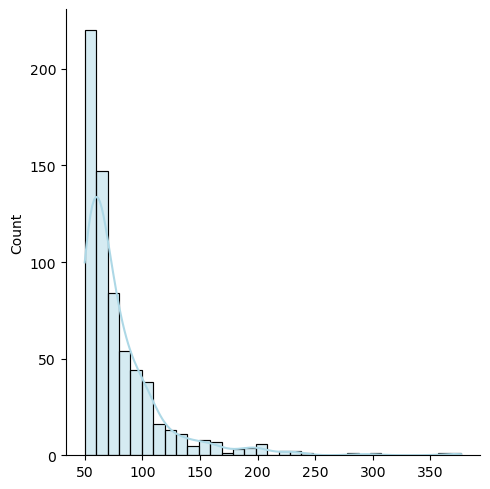

In [25]:
sns.displot(covdf.mean(axis=0), binwidth=10, color="lightblue", kde=True) # distribution of feature coverage after filtering

## plot feature_mean x gene_length

In [26]:
# read in gene length file
gene_length = pd.read_csv("/u/project/cluo/heffel/BICAN/ref/geneslop2k.bed", sep="\t")
gene_length

,#chr,start,end,gene
0,chr1,9868,16409,ENSG00000290825.1
1,chr1,10009,15670,ENSG00000223972.6
2,chr1,12403,31570,ENSG00000227232.5
3,chr1,15368,19436,ENSG00000278267.1
4,chr1,27553,33109,ENSG00000243485.5
...,...,...,...,...
62698,chrM,12148,16569,ENSG00000198695.2
62699,chrM,12673,16569,ENSG00000210194.1
62700,chrM,12746,16569,ENSG00000198727.2
62701,chrM,13887,16569,ENSG00000210195.2


In [27]:
# set index as the gene name
gene_length = gene_length.set_index("gene")
gene_length

,#chr,start,end
gene,,,
ENSG00000290825.1,chr1,9868,16409
ENSG00000223972.6,chr1,10009,15670
ENSG00000227232.5,chr1,12403,31570
ENSG00000278267.1,chr1,15368,19436
ENSG00000243485.5,chr1,27553,33109
...,...,...,...
ENSG00000198695.2,chrM,12148,16569
ENSG00000210194.1,chrM,12673,16569
ENSG00000198727.2,chrM,12746,16569


In [28]:
# create a new column "length" that has the length (end - start)
gene_length["length"] = gene_length["end"] - gene_length["start"]
gene_length

,#chr,start,end,length
gene,,,,
ENSG00000290825.1,chr1,9868,16409,6541
ENSG00000223972.6,chr1,10009,15670,5661
ENSG00000227232.5,chr1,12403,31570,19167
ENSG00000278267.1,chr1,15368,19436,4068
ENSG00000243485.5,chr1,27553,33109,5556
...,...,...,...,...
ENSG00000198695.2,chrM,12148,16569,4421
ENSG00000210194.1,chrM,12673,16569,3896
ENSG00000198727.2,chrM,12746,16569,3823


In [29]:
# create readable gene ID's (ie: FAM41C as opposed to ENSG00000230368.2)
conv_table = pd.read_csv("/u/project/cluo/heffel/BICAN/ensg_to_symbol.tsv", sep="\\t").set_index("ENSG").to_dict()["Symbol"]

# copy gene ID's to gene_length
gene_length.index = gene_length.index.map(lambda x: conv_table.get(x, x))
gene_length

,#chr,start,end,length
gene,,,,
ENSG00000290825.1,chr1,9868,16409,6541
ENSG00000223972.6,chr1,10009,15670,5661
WASH7P,chr1,12403,31570,19167
MIR6859-1,chr1,15368,19436,4068
MIR1302-2HG,chr1,27553,33109,5556
...,...,...,...,...
MT-ND6,chrM,12148,16569,4421
MT-TE,chrM,12673,16569,3896
MT-CYB,chrM,12746,16569,3823


In [30]:
gene_mean = covdf.mean() # caclulate mean methylation for each gene
gene_mean = pd.DataFrame(gene_mean) # turn Series into DataFrame
gene_mean = gene_mean.rename(columns={0: "mean"}) # rename column zero to mean
gene_mean

,mean
geneslop2k,
PRKCZ,76.163759
ENSG00000157933.11,50.421324
PRDM16,199.340157
ENSG00000162591.17,65.702741
ENSG00000171735.20,238.450872
...,...
GRAMD4,50.394980
TBC1D22A,135.297971
ENSG00000224271.8,70.279637


In [31]:
# find the common indices
common_indices = gene_length.index.intersection(gene_mean.index)
common_indices

Index(['PRKCZ', 'ENSG00000157933.11', 'PRDM16', 'ENSG00000162591.17',
       'ENSG00000171735.20', 'ENSG00000142599.20', 'CASZ1', 'KAZN', 'IGSF21',
       'EPHB2',
       ...
       'EFCAB6', 'PARVB', 'PRR5-ARHGAP8', 'PHF21B', 'CELSR1', 'GRAMD4',
       'TBC1D22A', 'ENSG00000224271.8', 'TAFA5', 'ENSG00000188511.14'],
      dtype='object', length=670)

In [32]:
# filter gene_length using the common indices
gene_length = gene_length.loc[common_indices]
gene_length

,#chr,start,end,length
PRKCZ,chr1,2048410,2187395,138985
ENSG00000157933.11,chr1,2225387,2312213,86826
PRDM16,chr1,3067167,3440621,373454
ENSG00000162591.17,chr1,3485950,3613508,127558
ENSG00000171735.20,chr1,6783453,7771706,988253
...,...,...,...,...
GRAMD4,chr22,46574011,46681790,107779
TBC1D22A,chr22,46760616,47177699,417083
ENSG00000224271.8,chr22,47628826,48025004,396178
TAFA5,chr22,48487552,48852912,365360


In [33]:
(gene_mean.index == gene_length.index).all() # check that indices match

np.True_

In [34]:
# add gene length to the gene mean DataFrame
gene_mean["length"] = gene_length["length"].reindex(gene_mean.index)
gene_mean

,mean,length
geneslop2k,,
PRKCZ,76.163759,138985
ENSG00000157933.11,50.421324,86826
PRDM16,199.340157,373454
ENSG00000162591.17,65.702741,127558
ENSG00000171735.20,238.450872,988253
...,...,...
GRAMD4,50.394980,107779
TBC1D22A,135.297971,417083
ENSG00000224271.8,70.279637,396178


<Axes: xlabel='length', ylabel='mean'>

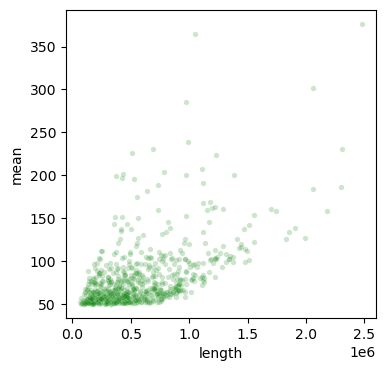

In [35]:
# scatter plot
sns.scatterplot(data=gene_mean, x="length", y="mean", alpha=0.2, s=15, color="green", legend=False)

## mask

In [36]:
# create mask of cell x feature with cov value <5 (to impute those values later)
mask = covdf >= 5
mask

geneslop2k,PRKCZ,ENSG00000157933.11,PRDM16,ENSG00000162591.17,ENSG00000171735.20,ENSG00000142599.20,CASZ1,KAZN,IGSF21,EPHB2,...,EFCAB6,PARVB,PRR5-ARHGAP8,PHF21B,CELSR1,GRAMD4,TBC1D22A,ENSG00000224271.8,TAFA5,ENSG00000188511.14
20210505-UMB5577-preAb-PFC-A09-L1_A1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
20210505-UMB5577-preAb-PFC-A09-L1_A10,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
20210505-UMB5577-preAb-PFC-A09-L1_A11,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
20210505-UMB5577-preAb-PFC-A09-L1_A12,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
20210505-UMB5577-preAb-PFC-A09-L1_A13,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20210505-UMB6096-preAb-PFC-B08-L1_P5,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
20210505-UMB6096-preAb-PFC-B08-L1_P6,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
20210505-UMB6096-preAb-PFC-B08-L1_P7,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
20210505-UMB6096-preAb-PFC-B08-L1_P8,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [37]:
# check that mask worked
cov_mask = covdf[mask]
cov_mask.head()

geneslop2k,PRKCZ,ENSG00000157933.11,PRDM16,ENSG00000162591.17,ENSG00000171735.20,ENSG00000142599.20,CASZ1,KAZN,IGSF21,EPHB2,...,EFCAB6,PARVB,PRR5-ARHGAP8,PHF21B,CELSR1,GRAMD4,TBC1D22A,ENSG00000224271.8,TAFA5,ENSG00000188511.14
20210505-UMB5577-preAb-PFC-A09-L1_A1,43.0,32.0,174.0,74.0,203.0,88.0,44.0,187.0,65.0,45.0,...,65.0,72.0,68.0,40.0,90.0,34.0,133.0,82.0,151.0,97.0
20210505-UMB5577-preAb-PFC-A09-L1_A10,56.0,52.0,149.0,62.0,245.0,155.0,65.0,220.0,50.0,34.0,...,34.0,60.0,52.0,61.0,62.0,39.0,182.0,87.0,138.0,55.0
20210505-UMB5577-preAb-PFC-A09-L1_A11,42.0,42.0,207.0,45.0,177.0,117.0,57.0,220.0,61.0,41.0,...,30.0,35.0,66.0,44.0,70.0,72.0,141.0,64.0,132.0,129.0
20210505-UMB5577-preAb-PFC-A09-L1_A12,81.0,79.0,205.0,66.0,311.0,83.0,154.0,258.0,47.0,36.0,...,34.0,37.0,59.0,42.0,124.0,15.0,190.0,52.0,201.0,88.0
20210505-UMB5577-preAb-PFC-A09-L1_A13,62.0,25.0,199.0,52.0,256.0,46.0,84.0,190.0,48.0,34.0,...,62.0,45.0,49.0,63.0,52.0,32.0,142.0,45.0,147.0,53.0


In [38]:
cov_mask.isna().sum().sum() # check how many NaN's

np.int64(102112)

In [39]:
print(f"{(cov_mask.isna().sum().sum() / (cov_mask.shape[0] * cov_mask.shape[1])) * 100:.2f}% data to be imputed") # check how many NaN's as a percentage

2.71% data to be imputed


In [40]:
# save mask
import pyarrow
mask.to_parquet('mask.parquet')

## fractions of gene body methylation

In [41]:
frac = countsdf / covdf # divide to get methylation fraction
frac

geneslop2k,PRKCZ,ENSG00000157933.11,PRDM16,ENSG00000162591.17,ENSG00000171735.20,ENSG00000142599.20,CASZ1,KAZN,IGSF21,EPHB2,...,EFCAB6,PARVB,PRR5-ARHGAP8,PHF21B,CELSR1,GRAMD4,TBC1D22A,ENSG00000224271.8,TAFA5,ENSG00000188511.14
20210505-UMB5577-preAb-PFC-A09-L1_A1,0.930233,0.906250,0.902299,0.959459,0.935961,0.931818,0.704545,0.834225,0.907692,0.977778,...,0.861538,0.791667,0.779412,0.775000,0.966667,0.705882,0.947368,0.951220,0.960265,0.958763
20210505-UMB5577-preAb-PFC-A09-L1_A10,0.625000,0.480769,0.946309,0.983871,0.861224,0.632258,0.969231,0.822727,0.880000,0.794118,...,0.617647,0.833333,0.365385,0.803279,0.870968,0.743590,0.791209,0.965517,0.746377,0.636364
20210505-UMB5577-preAb-PFC-A09-L1_A11,0.952381,0.928571,0.787440,0.600000,0.841808,0.820513,0.754386,0.886364,0.524590,0.951220,...,0.933333,0.914286,0.803030,0.363636,0.828571,0.805556,0.929078,0.859375,0.795455,0.906977
20210505-UMB5577-preAb-PFC-A09-L1_A12,0.962963,0.721519,0.897561,0.939394,0.874598,0.807229,0.564935,0.899225,0.851064,0.972222,...,0.970588,1.000000,0.932203,0.690476,0.766129,1.000000,0.989474,0.980769,0.810945,0.977273
20210505-UMB5577-preAb-PFC-A09-L1_A13,0.741935,0.760000,0.793970,0.826923,0.792969,0.826087,0.595238,0.889474,0.708333,0.735294,...,0.903226,0.911111,0.938776,0.809524,0.653846,0.343750,0.901408,0.911111,0.544218,0.830189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20210505-UMB6096-preAb-PFC-B08-L1_P5,0.403670,0.586207,0.750865,0.780488,0.870588,0.846939,0.792683,0.932075,0.846154,0.843750,...,0.887097,0.785714,0.840580,0.298246,0.964706,0.726027,0.909091,0.818182,0.744828,0.790698
20210505-UMB6096-preAb-PFC-B08-L1_P6,0.855932,0.852941,0.863222,0.935252,0.808864,0.768421,0.923913,0.903915,0.482759,0.661017,...,0.870968,0.877193,0.772727,0.680556,0.848101,0.762500,0.832335,0.835526,0.873171,0.903226
20210505-UMB6096-preAb-PFC-B08-L1_P7,0.930233,0.242424,0.927928,0.972973,0.733068,0.876543,0.542553,0.793333,0.872340,0.928571,...,0.804878,0.885714,0.869565,0.955556,0.574468,0.905660,0.933962,0.974359,0.751724,0.970588
20210505-UMB6096-preAb-PFC-B08-L1_P8,0.755102,0.807018,0.747423,0.711864,0.813559,0.828571,0.825000,0.839858,0.800000,0.924051,...,0.793103,0.833333,0.842105,0.784615,0.900763,0.916667,0.912281,0.715909,0.600791,0.660550


In [42]:
frac.isna().sum().sum() # check NaN's

np.int64(67828)

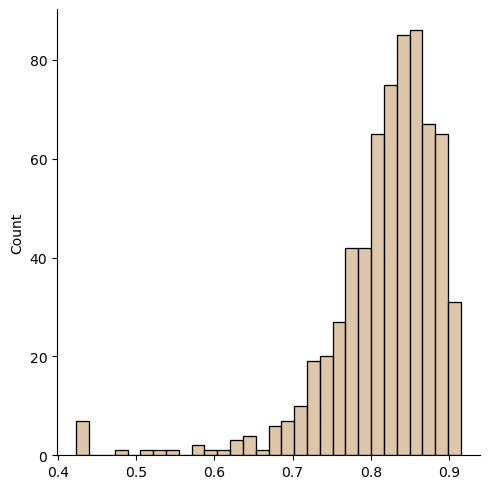

In [43]:
sns.displot(frac.mean(), bins=30, color="tan") # plot distribution of data

## create new AnnData object

In [44]:
len(covdata.obs)

5618

In [45]:
len(covdata.var) # get length of var

53100

In [46]:
var = covdata.var.drop(threshold, axis=0) # drop rows according to threshold
len(var) 

670

In [47]:
# create new anndata obj
adata = ad.AnnData(X=frac)

# copy over the obs & var
adata.obs = covdata.obs.copy()
adata.var = var

In [48]:
methyl_df = adata.to_df() # check new DataFrame
methyl_df.head()

geneslop2k,PRKCZ,ENSG00000157933.11,PRDM16,ENSG00000162591.17,ENSG00000171735.20,ENSG00000142599.20,CASZ1,KAZN,IGSF21,EPHB2,...,EFCAB6,PARVB,PRR5-ARHGAP8,PHF21B,CELSR1,GRAMD4,TBC1D22A,ENSG00000224271.8,TAFA5,ENSG00000188511.14
20210505-UMB5577-preAb-PFC-A09-L1_A1,0.930233,0.906250,0.902299,0.959459,0.935961,0.931818,0.704545,0.834225,0.907692,0.977778,...,0.861538,0.791667,0.779412,0.775000,0.966667,0.705882,0.947368,0.951220,0.960265,0.958763
20210505-UMB5577-preAb-PFC-A09-L1_A10,0.625000,0.480769,0.946309,0.983871,0.861224,0.632258,0.969231,0.822727,0.880000,0.794118,...,0.617647,0.833333,0.365385,0.803279,0.870968,0.743590,0.791209,0.965517,0.746377,0.636364
20210505-UMB5577-preAb-PFC-A09-L1_A11,0.952381,0.928571,0.787440,0.600000,0.841808,0.820513,0.754386,0.886364,0.524590,0.951220,...,0.933333,0.914286,0.803030,0.363636,0.828571,0.805556,0.929078,0.859375,0.795455,0.906977
20210505-UMB5577-preAb-PFC-A09-L1_A12,0.962963,0.721519,0.897561,0.939394,0.874598,0.807229,0.564935,0.899225,0.851064,0.972222,...,0.970588,1.000000,0.932203,0.690476,0.766129,1.000000,0.989474,0.980769,0.810945,0.977273
20210505-UMB5577-preAb-PFC-A09-L1_A13,0.741935,0.760000,0.793970,0.826923,0.792969,0.826087,0.595238,0.889474,0.708333,0.735294,...,0.903226,0.911111,0.938776,0.809524,0.653846,0.343750,0.901408,0.911111,0.544218,0.830189


In [49]:
methyl_df.isna().sum().sum() # check number of NaN's

np.int64(67828)

In [50]:
(methyl_df==0).sum().sum() # check number of 0's

np.int64(3198)

In [51]:
adata.shape # check shape

(5618, 670)

In [52]:
adata.write_h5ad("mcg_210505_5618x670.h5ad") # write adata file